<a href="https://colab.research.google.com/github/Ayman-Abdeen/Colab-/blob/main/%D9%86%D8%B3%D8%AE%D8%A9_%D9%85%D9%86_CIT651_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab


*   ##  mount drive

*   ## download from link directly to your drive

*   ## unzip a folder in drive




In [ ]:
# to be able to read and add files to your google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#!pip install wget

In [ ]:
#download from a link
'''
import wget
url =  '' ## the download link
destination = '/content/drive/My Drive/CIT651/heart.zip'  
wget.download(url, destination)
'''


"\nimport wget\nurl =  '' ## the download link\ndestination = '/content/drive/My Drive/CIT651/heart.zip'  \nwget.download(url, destination)\n"

In [ ]:
#UnZip file on drive
'''

import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/CIT651/heart.zip', 'r')
zip_ref.extractall('/content/drive/My Drive/CIT651/')
zip_ref.close()

'''

"\n\nimport zipfile\nzip_ref = zipfile.ZipFile('/content/drive/My Drive/CIT651/heart.zip', 'r')\nzip_ref.extractall('/content/drive/My Drive/CIT651/')\nzip_ref.close()\n\n"

#  **Pandas**

# Read CSV, Crosstab

In [ ]:
# start with pandas
import pandas as pd

In [ ]:
#read csv file

file = '/content/drive/My Drive/CIT651/heart.csv'
table = pd.read_csv(file)

In [ ]:
table.head()  ## table.tail() for the last records

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
table.target.value_counts() #/len(table)

1    165
0    138
Name: target, dtype: int64

In [ ]:
table[table.target == 1].sex.value_counts()#/len(table[table.target == 1])

1    93
0    72
Name: sex, dtype: int64

In [ ]:
pd.crosstab(table.sex, table.target)

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
table['gender'] = table['sex'].map(lambda x: 'Male' if x==1 else 'Female')
table['attack'] = table['target'].map(lambda x: 'Yes' if x ==1 else 'No')

In [ ]:
gender_attack = pd.crosstab(table.gender, table.attack) #, margins = True)
gender_attack

attack,No,Yes
gender,,
Female,24,72
Male,114,93


In [ ]:
gender_attack.loc['Female', 'Yes'] #/gender_attack.loc['All', 'Yes']

72

***Exercise*** 

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

* create new column 'bloodSugar' with values 'Yes' or 'No'

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

* convert chest pain column values to their corresponding meanings




In [ ]:
## code here

In [ ]:
## code here

In [ ]:
pd.crosstab(table.attack, table.bloodSugar, margins = True)

bloodSugar,No,Yes,All
attack,,,
No,116,22,138
Yes,142,23,165
All,258,45,303


In [ ]:
pd.crosstab(table.gender, [table.attack, table.bloodSugar])

attack      No     Yes    
bloodSugar  No Yes  No Yes
gender                    
Female      18   6  66   6
Male        98  16  76  17

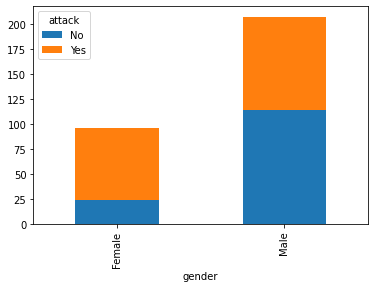

In [ ]:
pd.crosstab(table.gender, table.attack).plot(kind = 'bar', stacked = True)

[Pandas Crosstab](https://pbpython.com/pandas-crosstab.html)

# display shapes and data types

In [ ]:
table.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,attack,bloodSugar
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Male,Yes,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Male,Yes,No
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Female,Yes,No
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Male,Yes,No
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Female,Yes,No


In [ ]:
table.columns    ## table.keys() gets the same result

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'gender', 'attack',
       'bloodSugar'],
      dtype='object')

In [ ]:
table.axes


[RangeIndex(start=0, stop=303, step=1),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'gender', 'attack',
        'bloodSugar'],
       dtype='object')]

In [ ]:
table["target"].dtype

dtype('int64')

In [ ]:
table.dtypes

age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target          int64
gender         object
attack         object
bloodSugar     object
dtype: object

In [ ]:
table.shape

(303, 17)

In [ ]:
table.size

5151

In [ ]:
len(table)

303

# Selection

In [ ]:
# select a slice of a column

table['age'][:3]

0    63
1    37
2    41
Name: age, dtype: int64

In [ ]:
table[["age", 'fbs']][:5]

,age,fbs
0,63,1
1,37,0
2,41,0
3,56,0
4,57,0


In [ ]:
table.loc[:,'cp']  ## equivalent to **table.iloc[:,2]#**  where 2 is the index of 'cp' column
# table.iloc[:,2]

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

In [ ]:
table.loc[10:15, ['age', 'fbs', 'target']]

,age,fbs,target
10,54,0,1
11,48,0,1
12,49,0,1
13,64,0,1
14,58,1,1
15,50,0,1


In [ ]:
df = table[['age', 'target']][:3]
df

,age,target
0,63,1
1,37,1
2,41,1


In [ ]:
df.rename(columns = {'target':'heart_attack'})

,age,heart_attack
0,63,1
1,37,1
2,41,1


In [ ]:
df.T  ## transpose of the table

,0,1,2
age,63,37,41
target,1,1,1


# Addition

In [ ]:
df1 = table[['age', 'target']][:3]
df2 = table[['age', 'target']][3:5]


In [ ]:
df1

,age,target
0,63,1
1,37,1
2,41,1


In [ ]:
df2

,age,target
3,56,1
4,57,1


In [ ]:
df1.append(df2)

,age,target
0,63,1
1,37,1
2,41,1
3,56,1
4,57,1


In [ ]:
df1

,age,target
0,63,1
1,37,1
2,41,1


# Iteration / Sorting

In [ ]:
for key in table:
    print(key)
    

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target
gender
attack
bloodSugar


In [ ]:

for key, value in dfT.iteritems():
  print(key, value)  ## they are just copies!

age 0    63
1    37
2    41
Name: age, dtype: int64
target 0    1
1    1
2    1
Name: target, dtype: int64


In [ ]:
table[['age', 'target']].sort_values('age')[:5]  ## sort by 'age' column 

,age,target
72,29,1
58,34,1
125,34,1
239,35,0
65,35,1


# from pandas to numpy

In [ ]:
age_cp = table[['age', 'cp']][:3].to_numpy()

In [ ]:
type(age_cp)

numpy.ndarray

In [ ]:
age_cp

array([[63,  3],
       [37,  2],
       [41,  1]])

In [ ]:
table[['age', 'cp']][:3].values

array([[63,  3],
       [37,  2],
       [41,  1]])

In [ ]:
import numpy as np
df2=pd.DataFrame(np.random.rand(3,3),index=['X','Y','Z'],columns=['C1','C2','C3'])
print(df2)

         C1        C2        C3
X  0.889170  0.408460  0.542195
Y  0.115212  0.648882  0.663185
Z  0.122847  0.418989  0.212299


# numpy broadcasting

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
z = np.array([1,2,0,0]).reshape(4, 1)

In [ ]:
x+10

array([[11, 12, 13],
       [14, 15, 16],
       [17, 18, 19],
       [20, 21, 22]])

In [ ]:
x+v

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

In [ ]:
x + z

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
v + v.reshape(3,1)

array([[2, 1, 2],
       [1, 0, 1],
       [2, 1, 2]])